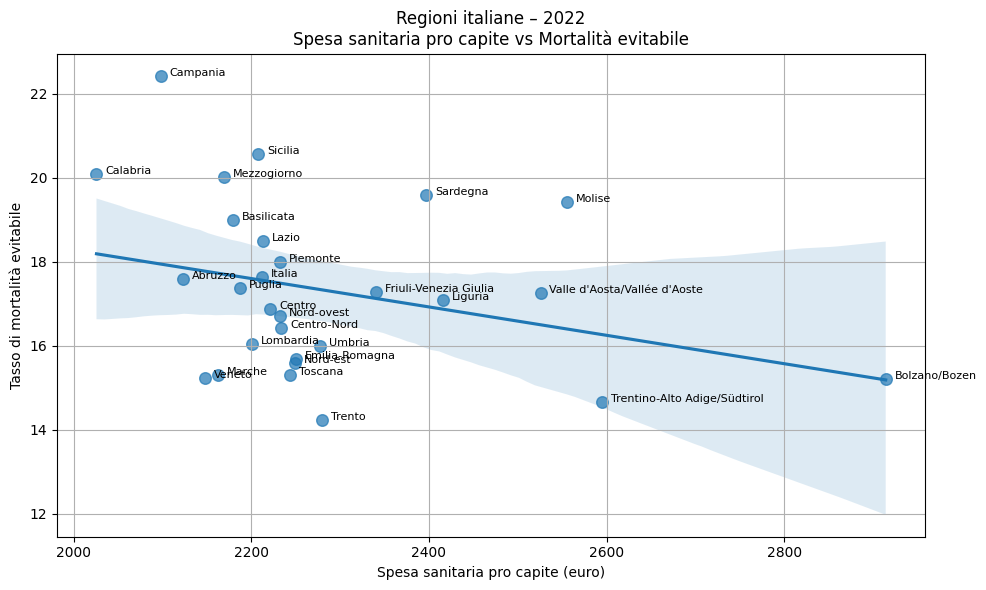

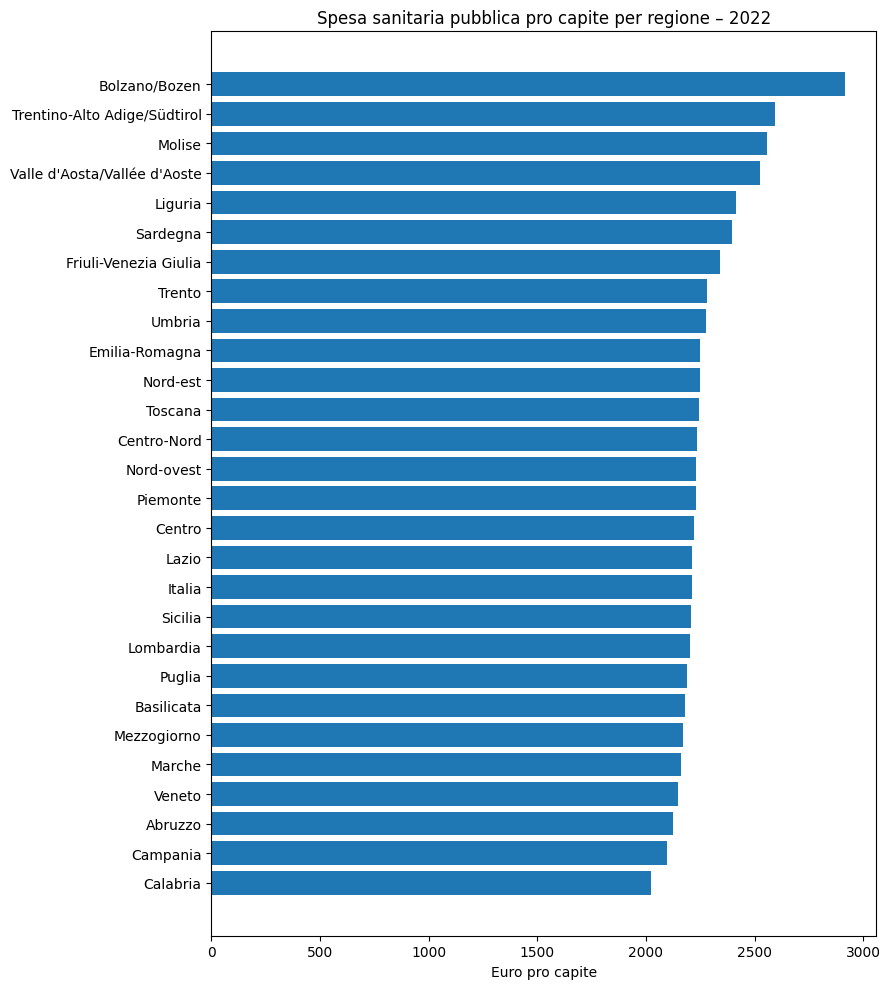

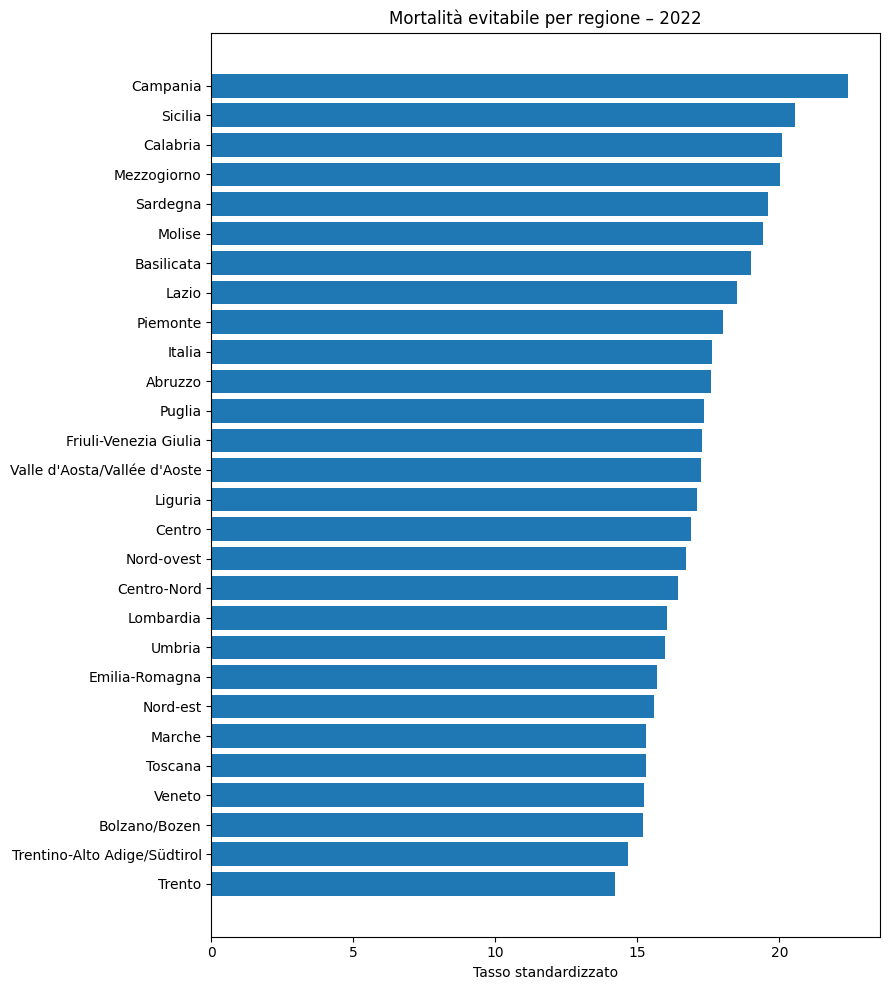

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("Sanità_e_salute.xlsx", sheet_name="Dati Italia e Regioni")


ANNO = "2022"  
INDICATORE_SPESA = "Spesa sanitaria pubblica corrente per abitante"
INDICATORE_MORT = "Tasso standardizzato di mortalità evitabile"


spesa = df[
    (df["Indicatore"] == INDICATORE_SPESA) &
    (df["Modalità"].str.lower() == "totale") &
    (df["Unità di misura"].str.contains("euro", case=False)) &
    (df[ANNO].notna())
][["Territorio", ANNO]].copy()

spesa.columns = ["Regione", "Spesa pro capite"]
spesa["Spesa pro capite"] = pd.to_numeric(spesa["Spesa pro capite"], errors="coerce")


mortalita = df[
    (df["Indicatore"] == INDICATORE_MORT) &
    (df["Modalità"].str.lower() == "totale") &
    (df[ANNO].notna())
][["Territorio", ANNO]].copy()

mortalita.columns = ["Regione", "Mortalità evitabile"]
mortalita["Mortalità evitabile"] = pd.to_numeric(mortalita["Mortalità evitabile"], errors="coerce")

# Unisce i due DataFrame sui nomi delle regioni
dati = spesa.merge(mortalita, on="Regione")
dati = dati.dropna()


plt.figure(figsize=(10, 6))
sns.regplot(data=dati, x="Spesa pro capite", y="Mortalità evitabile", scatter_kws={"s": 70, "alpha": 0.7})
for _, row in dati.iterrows():
    plt.text(row["Spesa pro capite"] + 10, row["Mortalità evitabile"], row["Regione"], fontsize=8)

plt.title(f"Regioni italiane – {ANNO}\nSpesa sanitaria pro capite vs Mortalità evitabile")
plt.xlabel("Spesa sanitaria pro capite (euro)")
plt.ylabel("Tasso di mortalità evitabile")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(9, 10))
dati_sorted = dati.sort_values("Spesa pro capite")
plt.barh(dati_sorted["Regione"], dati_sorted["Spesa pro capite"])
plt.title(f"Spesa sanitaria pubblica pro capite per regione – {ANNO}")
plt.xlabel("Euro pro capite")
plt.tight_layout()
plt.show()


plt.figure(figsize=(9, 10))
dati_sorted = dati.sort_values("Mortalità evitabile")
plt.barh(dati_sorted["Regione"], dati_sorted["Mortalità evitabile"])
plt.title(f"Mortalità evitabile per regione – {ANNO}")
plt.xlabel("Tasso standardizzato")
plt.tight_layout()
plt.show()


dati.to_csv("regioni_spesa_vs_mortalita.csv", index=False)


c:\Users\colai\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\array.py:334: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  self.crs = crs
c:\Users\colai\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\geodataframe.py:409: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  level.crs = crs


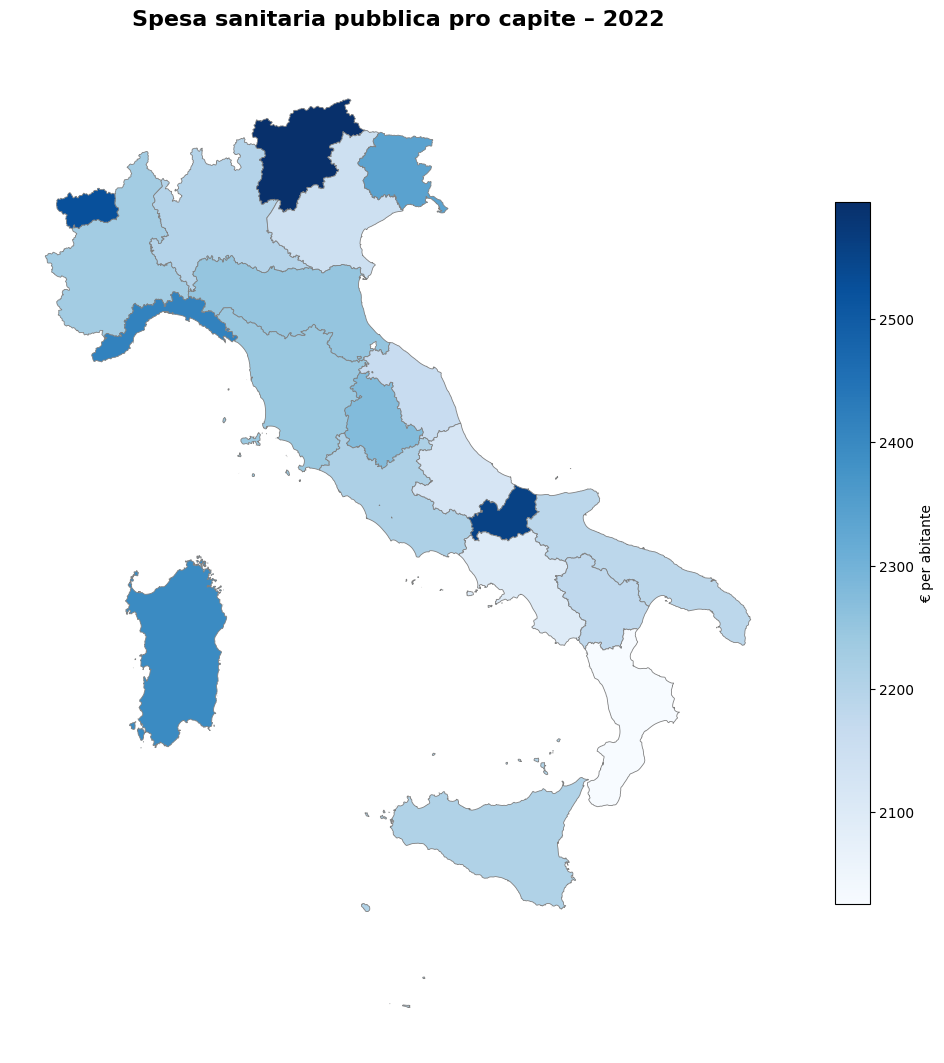

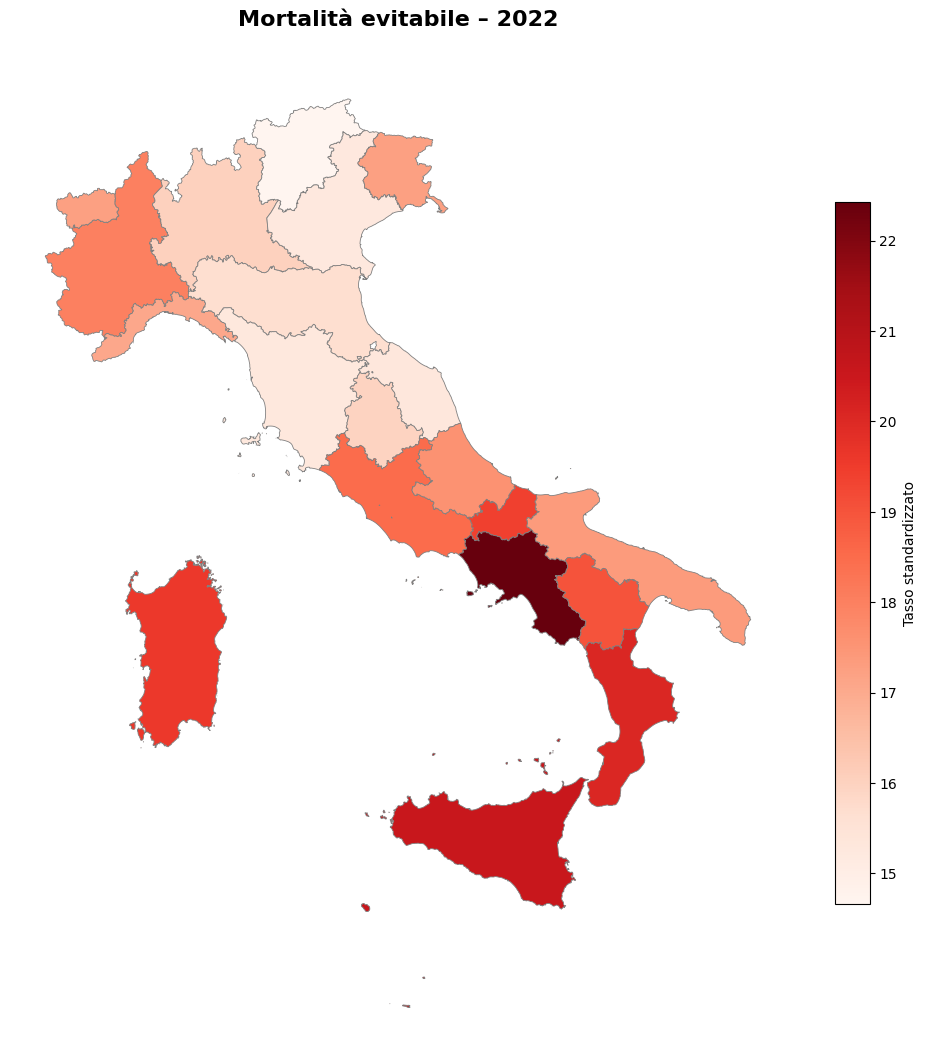

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


shapefile_path = "Limiti01012025_g/Reg01012025_g/Reg01012025_g_WGS84.shp"
gdf = gpd.read_file(shapefile_path)


df = pd.read_excel("Sanità_e_salute.xlsx", sheet_name="Dati Italia e Regioni")

ANNO = "2022"
spesa = df[
    (df["Indicatore"] == "Spesa sanitaria pubblica corrente per abitante") &
    (df["Modalità"].str.lower() == "totale") &
    (df["Unità di misura"].str.contains("euro", case=False)) &
    (df[ANNO].notna())
][["Territorio", ANNO]].copy()
spesa.columns = ["Regione", "Spesa pro capite"]
spesa["Spesa pro capite"] = pd.to_numeric(spesa["Spesa pro capite"], errors="coerce")

mortalita = df[
    (df["Indicatore"] == "Tasso standardizzato di mortalità evitabile") &
    (df["Modalità"].str.lower() == "totale") &
    (df[ANNO].notna())
][["Territorio", ANNO]].copy()
mortalita.columns = ["Regione", "Mortalità evitabile"]
mortalita["Mortalità evitabile"] = pd.to_numeric(mortalita["Mortalità evitabile"], errors="coerce")




dati = pd.merge(spesa, mortalita, on="Regione")


def normalizza_nome(nome):
    if isinstance(nome, str):
        return nome.split("/")[0].strip() 
    return nome


gdf["REGIONE_NORM"] = gdf["DEN_REG"].apply(normalizza_nome)
dati["REGIONE_NORM"] = dati["Regione"].apply(normalizza_nome)


gdf = gdf.merge(
    dati[["REGIONE_NORM", "Spesa pro capite", "Mortalità evitabile"]],
    on="REGIONE_NORM",
    how="left"
)



def plot_choropleth(gdf, column, cmap, title, legend_title):
    fig, ax = plt.subplots(1, 1, figsize=(10, 12))
    gdf.plot(
        column=column,
        cmap=cmap,
        linewidth=0.6,
        edgecolor="0.5",
        legend=True,
        legend_kwds={
            "label": legend_title,
            "orientation": "vertical",
            "shrink": 0.6
        },
        ax=ax
    )
    ax.set_title(title, fontsize=16, weight="bold", pad=20)
    ax.axis("off")
    plt.tight_layout()
    plt.show()


plot_choropleth(
    gdf,
    column="Spesa pro capite",
    cmap="Blues",
    title=f"Spesa sanitaria pubblica pro capite – {ANNO}",
    legend_title="€ per abitante"
)

plot_choropleth(
    gdf,
    column="Mortalità evitabile",
    cmap="Reds",
    title=f"Mortalità evitabile – {ANNO}",
    legend_title="Tasso standardizzato"
)


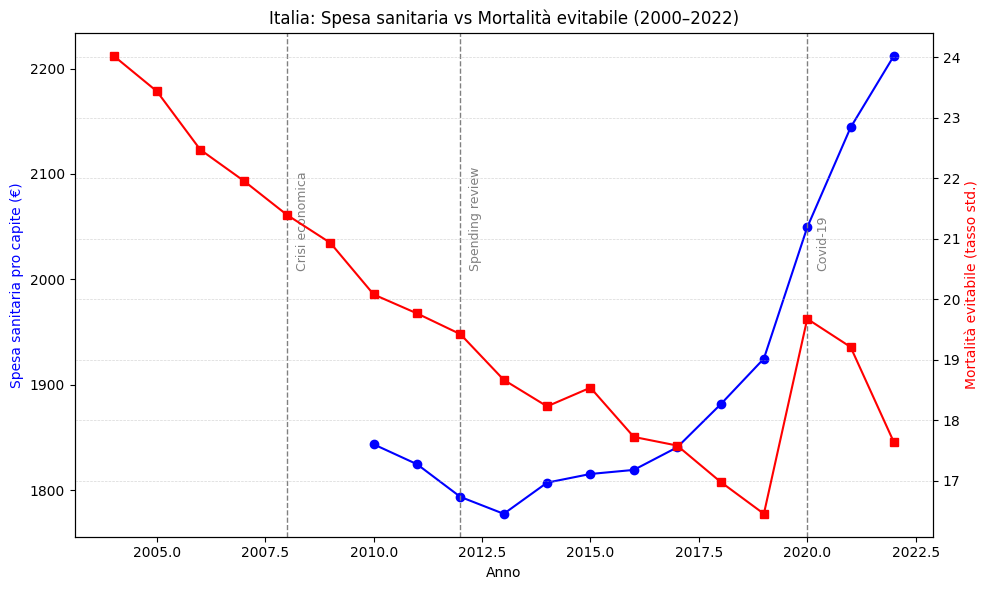

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("Sanità_e_salute.xlsx", sheet_name="Dati Italia e Regioni")


df["Territorio"] = df["Territorio"].str.strip()
df["Modalità"] = df["Modalità"].str.lower().str.strip()


spesa = df[
    (df["Indicatore"] == "Spesa sanitaria pubblica corrente per abitante") &
    (df["Territorio"].str.lower() == "italia") &
    (df["Modalità"] == "totale") &
    (df["Unità di misura"].str.contains("euro", case=False, na=False))
]


morte = df[
    (df["Indicatore"] == "Tasso standardizzato di mortalità evitabile") &
    (df["Territorio"].str.lower() == "italia") &
    (df["Modalità"] == "totale")
]


anni = [col for col in df.columns if str(col).isdigit()]
serie_spesa = pd.to_numeric(spesa.iloc[0][anni], errors="coerce")
serie_morte = pd.to_numeric(morte.iloc[0][anni], errors="coerce")


serie_spesa.index = serie_spesa.index.astype(int)
serie_morte.index = serie_morte.index.astype(int)


common_years = sorted(set(serie_spesa.index).intersection(serie_morte.index))
serie_spesa = serie_spesa.loc[common_years]
serie_morte = serie_morte.loc[common_years]


fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(common_years, serie_spesa.values, color='blue', marker='o', label='Spesa sanitaria pro capite')
ax2.plot(common_years, serie_morte.values, color='red', marker='s', label='Mortalità evitabile')

ax1.set_ylabel("Spesa sanitaria pro capite (€)", color='blue')
ax2.set_ylabel("Mortalità evitabile (tasso std.)", color='red')
ax1.set_xlabel("Anno")
plt.title("Italia: Spesa sanitaria vs Mortalità evitabile (2000–2022)")


for anno, evento in [(2008, "Crisi economica"), (2012, "Spending review"), (2020, "Covid-19")]:
    ax1.axvline(x=anno, linestyle="--", color="gray", lw=1)
    ax1.text(anno + 0.2, ax1.get_ylim()[1]*0.9, evento, rotation=90, fontsize=9, color="gray")

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


<h1>HEATMAP 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("Sanità_e_salute.xlsx", sheet_name="Dati Italia e Regioni")


spesa = df[
    (df["Indicatore"] == "Spesa sanitaria pubblica corrente per abitante") &
    (df["Modalità"].str.lower() == "totale") &
    (df["Unità di misura"].str.lower().str.contains("euro")) &
    (~df["Territorio"].str.contains("Italia|Nord|Sud|Centro", na=False))
]


anni = [col for col in spesa.columns if str(col).isdigit()]
heatmap_df = spesa[["Territorio"] + anni].copy()
heatmap_df = heatmap_df.set_index("Territorio")


In [ ]:

non_numeric = heatmap_df.applymap(lambda x: not pd.api.types.is_number(x))
heatmap_df[non_numeric.any(axis=1)]


C:\Users\colai\AppData\Local\Temp\ipykernel_8428\3584856904.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric = heatmap_df.applymap(lambda x: not pd.api.types.is_number(x))


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Territorio,,,,,,,,,,,,,,,,,,,,
Piemonte,....,....,....,....,....,....,1911.491892,1880.865255,1857.942545,1810.393027,1826.334069,1819.904881,1833.943400,1829.933208,1882.166509,1950.672380,2063.264983,2161.869600,2232.222998,....
Valle d'Aosta/Vallée d'Aoste,....,....,....,....,....,....,2152.843361,2170.738559,2159.068650,2125.651648,2022.869241,1938.551659,1961.579530,1955.989509,2012.476940,2065.803624,2371.214727,2444.580169,2525.586308,....
Liguria,....,....,....,....,....,....,2056.586541,2023.486850,1956.281535,1957.051732,2003.992784,1983.093159,1994.571298,2011.328357,2058.993693,2094.150201,2205.060357,2337.000667,2416.041763,....
Lombardia,....,....,....,....,....,....,1821.714775,1831.225388,1774.088434,1801.688083,1858.279783,1855.118622,1860.660023,1907.846482,1946.572568,1971.310704,2056.781870,2136.763374,2200.856088,....
Trentino-Alto Adige/Südtirol,....,....,....,....,....,....,2019.585166,2046.304897,2103.569313,2080.246529,2042.688657,2019.309709,2031.181177,2081.582699,2121.259138,2109.370997,2371.053051,2520.885582,2594.609338,....
Bolzano/Bozen,....,....,....,....,....,....,2183.732929,2188.458578,2254.497475,2232.682652,2155.471851,2195.247013,2199.820709,2263.353163,2304.211690,2269.722213,2584.844775,2829.368002,2914.219529,....
Trento,....,....,....,....,....,....,1862.099456,1909.902149,1958.758630,1933.969108,1934.271795,1849.813530,1867.502982,1904.277864,1942.041471,1952.875497,2161.201860,2216.845027,2280.052965,....
Veneto,....,....,....,....,....,....,1735.353438,1716.067446,1692.760093,1667.102314,1683.141239,1725.873184,1736.239870,1760.702769,1778.987188,1810.313563,1957.213339,2081.740450,2147.846493,....
Friuli-Venezia Giulia,....,....,....,....,....,....,1994.100307,2022.044211,2035.348159,2004.363794,1942.278897,2070.704801,2085.495288,2163.768605,2097.088800,2065.559262,2135.189916,2266.893579,2340.381883,....


C:\Users\colai\AppData\Local\Temp\ipykernel_8428\104848325.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spesa_clean = spesa.replace(["....", "-", "..."], pd.NA).astype(float)
C:\Users\colai\AppData\Local\Temp\ipykernel_8428\104848325.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mortalita_clean = mortalita.replace(["....", "-", "..."], pd.NA).astype(float)
C:\Users\colai\AppData\Local\Temp\ipykernel_8428\104848325.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future v

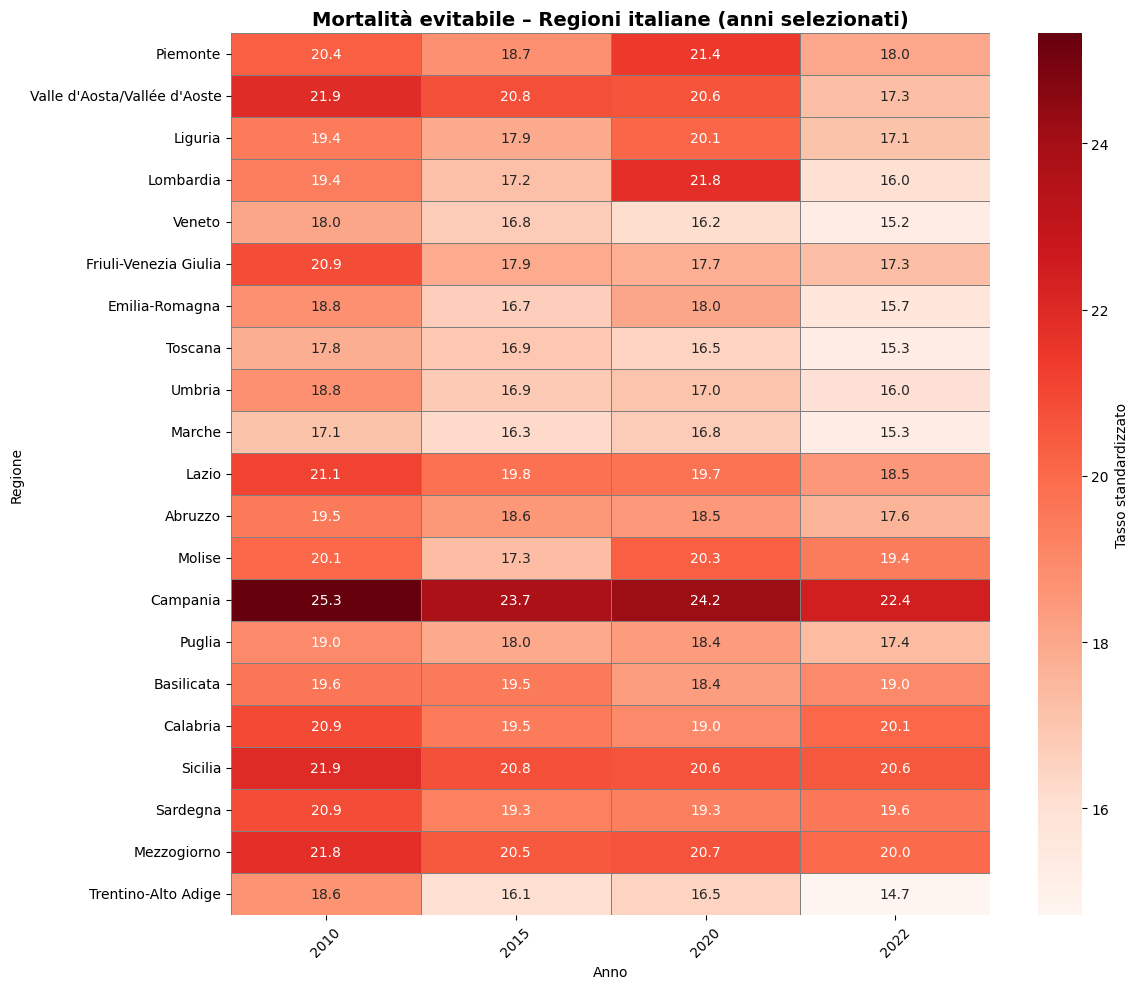

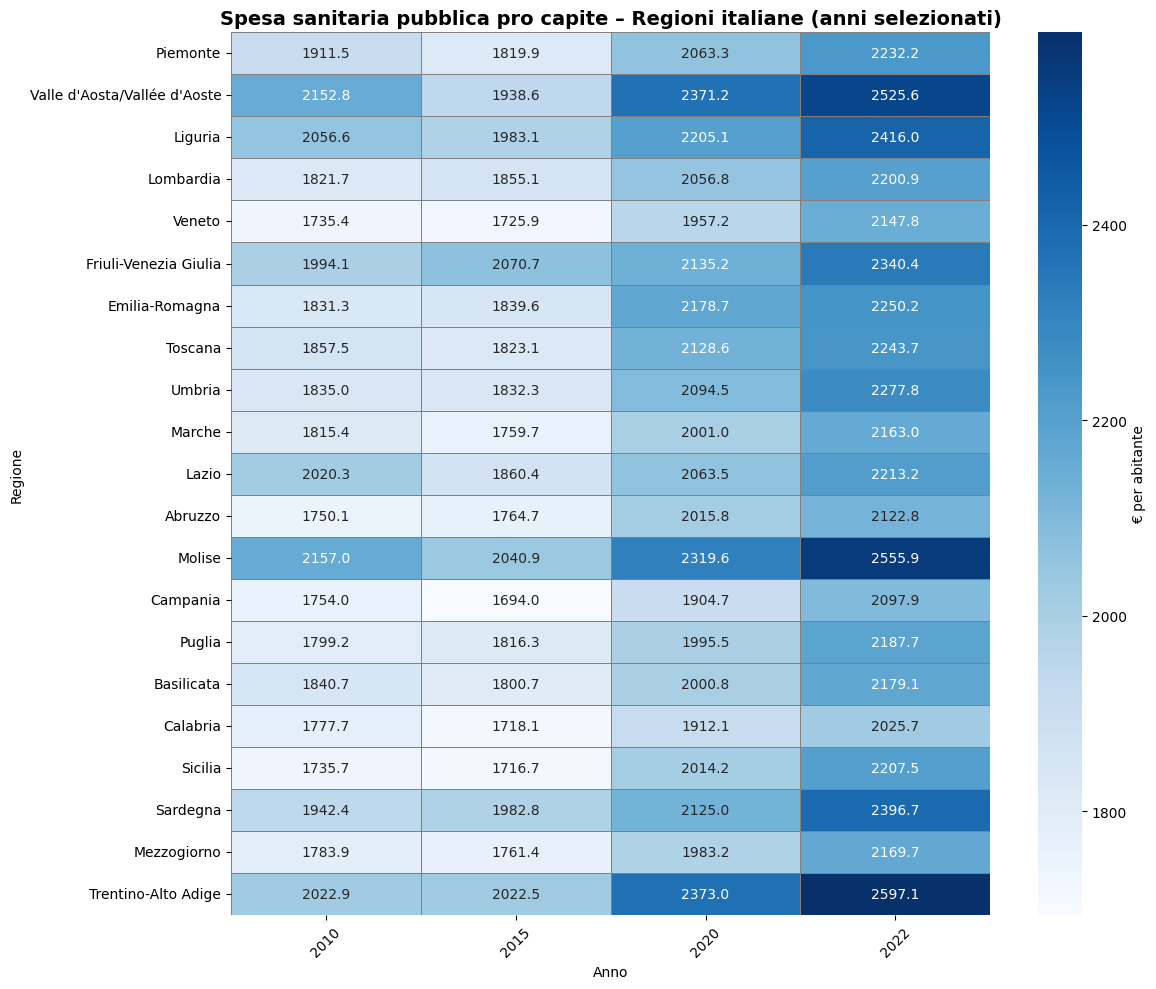

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("Sanità_e_salute.xlsx", sheet_name="Dati Italia e Regioni")


anni = ["2010", "2015", "2020", "2022"]
filtro_regioni = ~df["Territorio"].str.contains("Italia|Nord|Sud|Centro", na=False)


spesa = df[
    (df["Indicatore"] == "Spesa sanitaria pubblica corrente per abitante") &
    (df["Modalità"].str.lower() == "totale") &
    (df["Unità di misura"].str.lower().str.contains("euro")) &
    filtro_regioni
][["Territorio"] + anni].copy().set_index("Territorio")


mortalita = df[
    (df["Indicatore"] == "Tasso standardizzato di mortalità evitabile") &
    (df["Modalità"].str.lower() == "totale") &
    filtro_regioni
][["Territorio"] + anni].copy().set_index("Territorio")


spesa_clean = spesa.replace(["....", "-", "..."], pd.NA).astype(float)
mortalita_clean = mortalita.replace(["....", "-", "..."], pd.NA).astype(float)


for nome in ["Bolzano/Bozen", "Trento", "Trentino-Alto Adige", "Trentino-Alto Adige/Südtirol"]:
    spesa_clean = spesa_clean.drop(nome, errors="ignore")
    mortalita_clean = mortalita_clean.drop(nome, errors="ignore")


spesa_trentino = spesa.loc[["Bolzano/Bozen", "Trento"]].replace(["....", "-", "..."], pd.NA).astype(float).mean()
mortalita_trentino = mortalita.loc[["Bolzano/Bozen", "Trento"]].replace(["....", "-", "..."], pd.NA).astype(float).mean()


spesa_clean.loc["Trentino-Alto Adige"] = spesa_trentino
mortalita_clean.loc["Trentino-Alto Adige"] = mortalita_trentino


def disegna_heatmap(dataframe, cmap, titolo, etichetta_colore):
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        dataframe,
        cmap=cmap,
        linewidths=0.5,
        linecolor='gray',
        annot=True,
        fmt=".1f",
        cbar_kws={"label": etichetta_colore}
    )
    plt.title(titolo, fontsize=14, weight='bold')
    plt.xlabel("Anno")
    plt.ylabel("Regione")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


disegna_heatmap(
    dataframe=mortalita_clean,
    cmap="Reds",
    titolo="Mortalità evitabile – Regioni italiane (anni selezionati)",
    etichetta_colore="Tasso standardizzato"
)


disegna_heatmap(
    dataframe=spesa_clean,
    cmap="Blues",
    titolo="Spesa sanitaria pubblica pro capite – Regioni italiane (anni selezionati)",
    etichetta_colore="€ per abitante"
)


<h1> È un rapporto tra quanto si spende e quanti decessi evitabili ci sono.
Serve per valutare quanto efficacemente ogni regione usa le risorse sanitarie.

<p>Questo grafico mostra l'efficienza sanitaria delle regioni italiane dal 2010 al 2022.

L'efficienza è calcolata come:
    Spesa sanitaria pro capite / Mortalità evitabile

Significato:
- Valori più alti → la regione spende molto ma ottiene poca riduzione della mortalità → meno efficiente
- Valori più bassi → la regione spende relativamente poco ma ha bassa mortalità → più efficiente

La heatmap permette di confrontare le performance sanitarie delle regioni nel tempo, evidenziando criticità e buone pratiche.


C:\Users\colai\AppData\Local\Temp\ipykernel_18296\3555892327.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spesa_clean = spesa.replace(["....", "-", "..."], pd.NA).astype(float)
C:\Users\colai\AppData\Local\Temp\ipykernel_18296\3555892327.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mortalita_clean = mortalita.replace(["....", "-", "..."], pd.NA).astype(float)
C:\Users\colai\AppData\Local\Temp\ipykernel_18296\3555892327.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

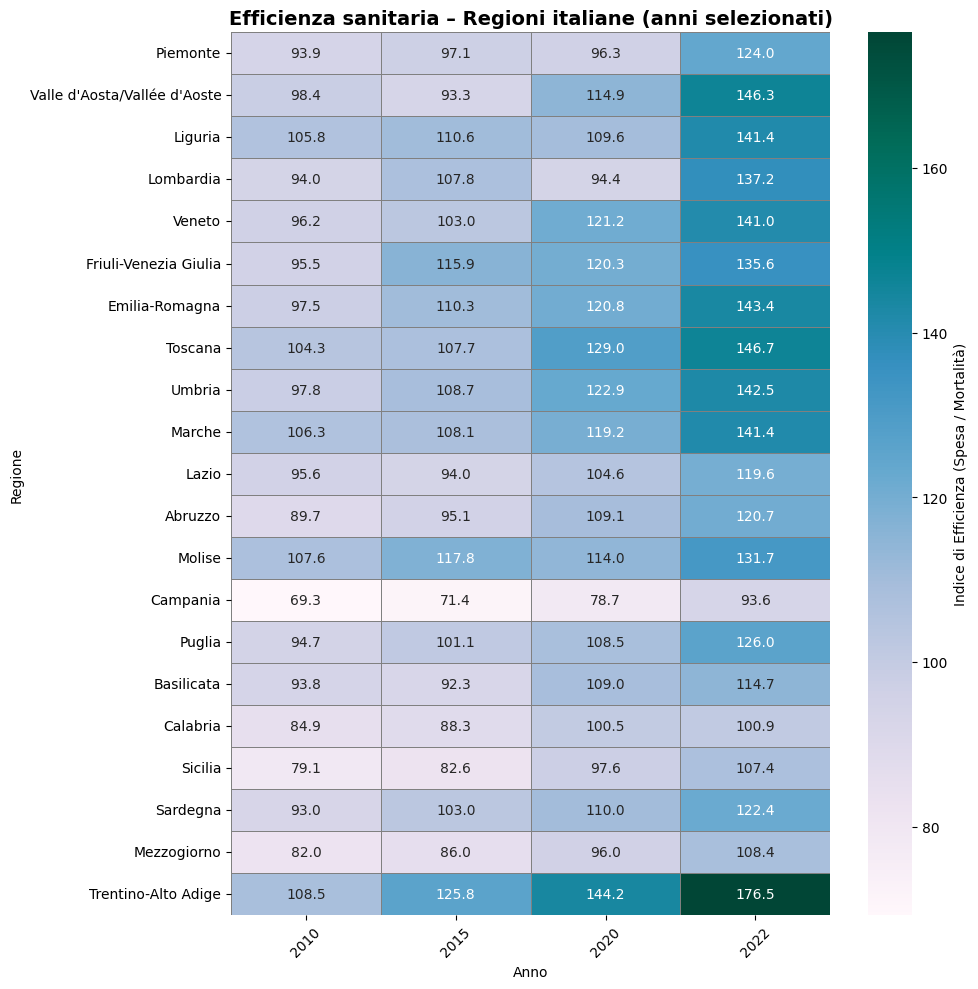

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("Sanità_e_salute.xlsx", sheet_name="Dati Italia e Regioni")


anni = ["2010", "2015", "2020", "2022"]


spesa = df[
    (df["Indicatore"] == "Spesa sanitaria pubblica corrente per abitante") &
    (df["Modalità"].str.lower() == "totale") &
    (df["Unità di misura"].str.lower().str.contains("euro")) &
    (~df["Territorio"].str.contains("Italia|Nord|Sud|Centro", na=False))
][["Territorio"] + anni].copy().set_index("Territorio")


mortalita = df[
    (df["Indicatore"] == "Tasso standardizzato di mortalità evitabile") &
    (df["Modalità"].str.lower() == "totale") &
    (~df["Territorio"].str.contains("Italia|Nord|Sud|Centro", na=False))
][["Territorio"] + anni].copy().set_index("Territorio")


spesa_clean = spesa.replace(["....", "-", "..."], pd.NA).astype(float)
mortalita_clean = mortalita.replace(["....", "-", "..."], pd.NA).astype(float)


for nome in ["Bolzano/Bozen", "Trento", "Trentino-Alto Adige/Südtirol", "Trentino-Alto Adige"]:
    spesa_clean = spesa_clean.drop(nome, errors="ignore")
    mortalita_clean = mortalita_clean.drop(nome, errors="ignore")


spesa_trentino = spesa.loc[["Bolzano/Bozen", "Trento"]].replace(["....", "-", "..."], pd.NA).astype(float).mean()
mortalita_trentino = mortalita.loc[["Bolzano/Bozen", "Trento"]].replace(["....", "-", "..."], pd.NA).astype(float).mean()

spesa_clean.loc["Trentino-Alto Adige"] = spesa_trentino
mortalita_clean.loc["Trentino-Alto Adige"] = mortalita_trentino


efficienza = spesa_clean / mortalita_clean


efficienza = efficienza[~efficienza.index.duplicated(keep='first')]


plt.figure(figsize=(10, 10))
sns.heatmap(
    efficienza,
    cmap="PuBuGn",
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Indice di Efficienza (Spesa / Mortalità)"}
)
plt.title("Efficienza sanitaria – Regioni italiane (anni selezionati)", fontsize=14, weight='bold')
plt.xlabel("Anno")
plt.ylabel("Regione")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



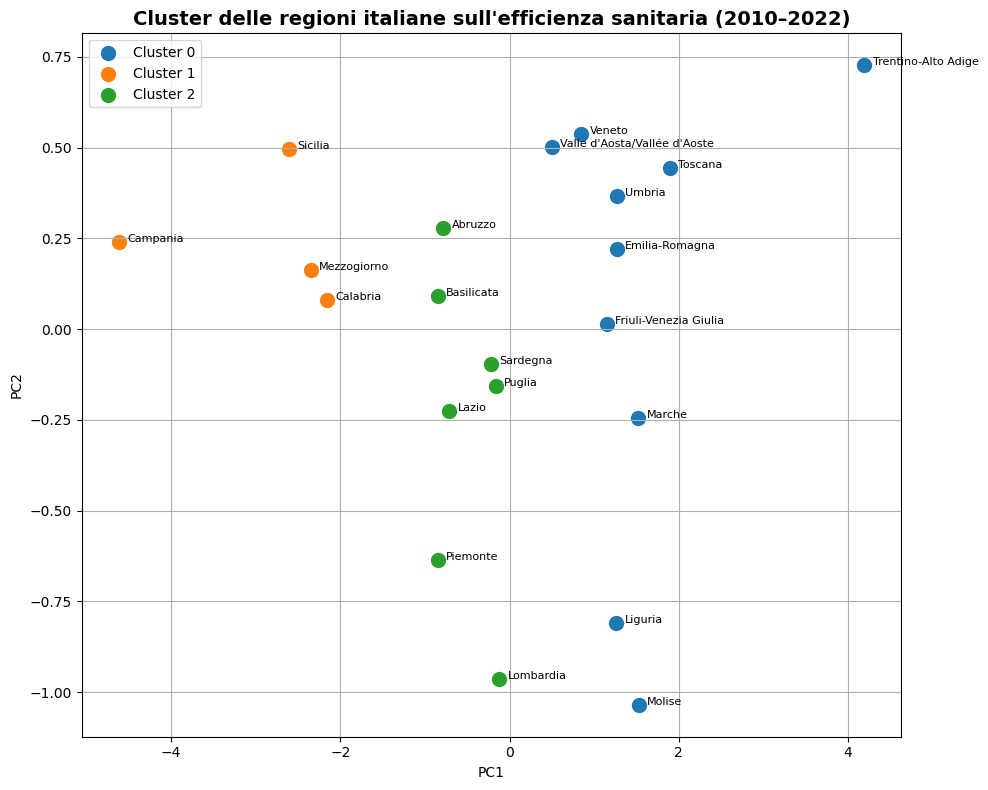

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


eff_pca = efficienza.dropna()


scaler = StandardScaler()
eff_scaled = scaler.fit_transform(eff_pca)


pca = PCA(n_components=2)
eff_pca_2d = pca.fit_transform(eff_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(eff_pca_2d)


pca_df = pd.DataFrame({
    "PC1": eff_pca_2d[:, 0],
    "PC2": eff_pca_2d[:, 1],
    "Regione": eff_pca.index,
    "Cluster": clusters
})


plt.figure(figsize=(10, 8))


for cluster_id in sorted(pca_df["Cluster"].unique()):
    cluster_data = pca_df[pca_df["Cluster"] == cluster_id]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {cluster_id}", s=100)


for _, row in pca_df.iterrows():
    plt.text(row["PC1"] + 0.1, row["PC2"], row["Regione"], fontsize=8)


plt.title("Cluster delle regioni italiane sull'efficienza sanitaria (2010–2022)", fontsize=14, weight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




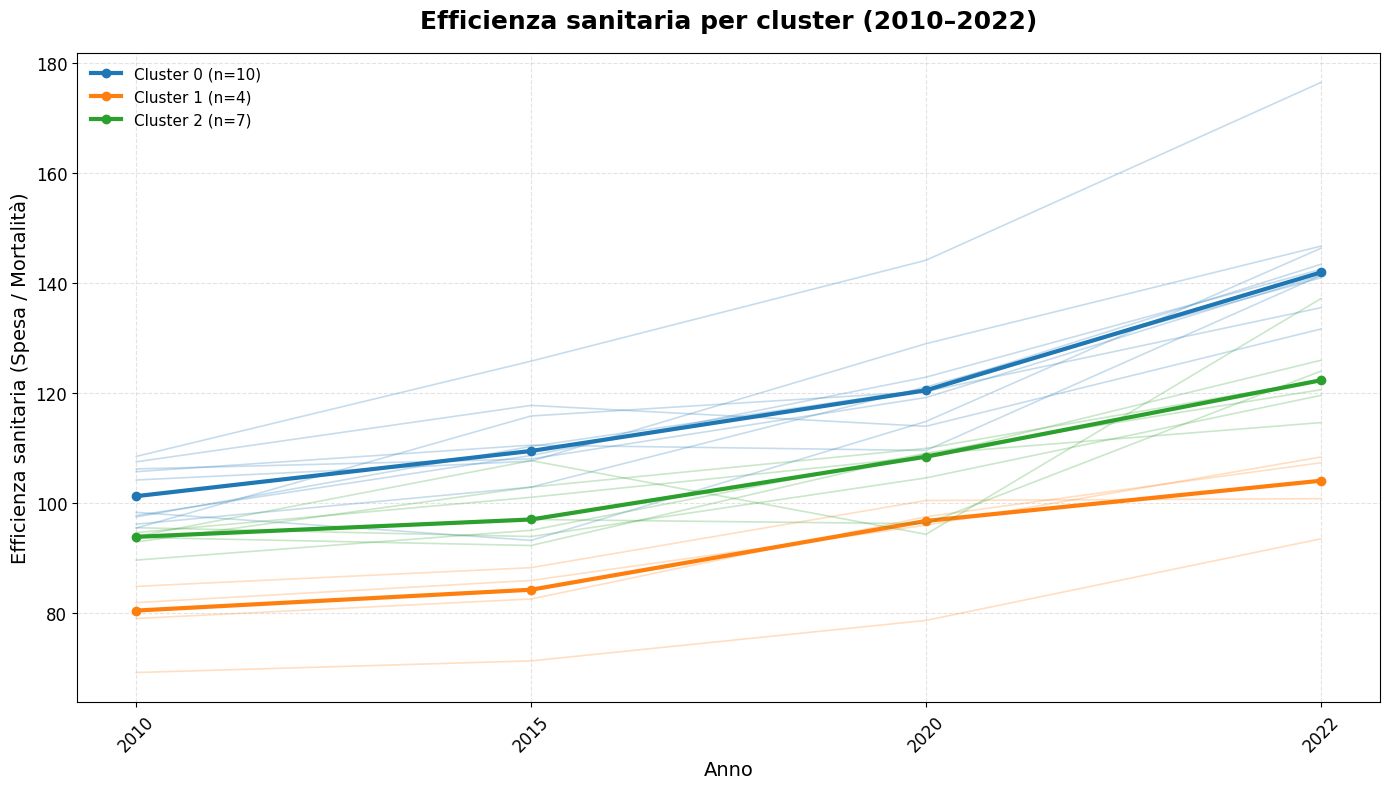

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


eff_parallel = efficienza.copy()
eff_parallel["Cluster"] = pca_df.set_index("Regione")["Cluster"]
eff_parallel["Regione"] = eff_parallel.index
anni = list(efficienza.columns)


cluster_palette = {
    0: "#1f77b4",
    1: "#ff7f0e",  
    2: "#2ca02c",  
}


plt.figure(figsize=(14, 8))
ax = plt.gca()

for cluster_id in sorted(eff_parallel["Cluster"].unique()):
    cluster_data = eff_parallel[eff_parallel["Cluster"] == cluster_id]

  
    for _, row in cluster_data.iterrows():
        ax.plot(anni, row[anni].values, color=cluster_palette[cluster_id],
                linewidth=1.2, alpha=0.25)


    med = cluster_data[anni].median().values
    ax.plot(anni, med, color=cluster_palette[cluster_id], linewidth=3,
            marker="o", label=f"Cluster {cluster_id} (n={len(cluster_data)})")


plt.title("Efficienza sanitaria per cluster (2010–2022)", fontsize=18, weight='bold', pad=18)
plt.xlabel("Anno", fontsize=14)
plt.ylabel("Efficienza sanitaria (Spesa / Mortalità)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.35)

plt.legend(frameon=False, fontsize=11, loc="upper left")
plt.tight_layout()
plt.show()


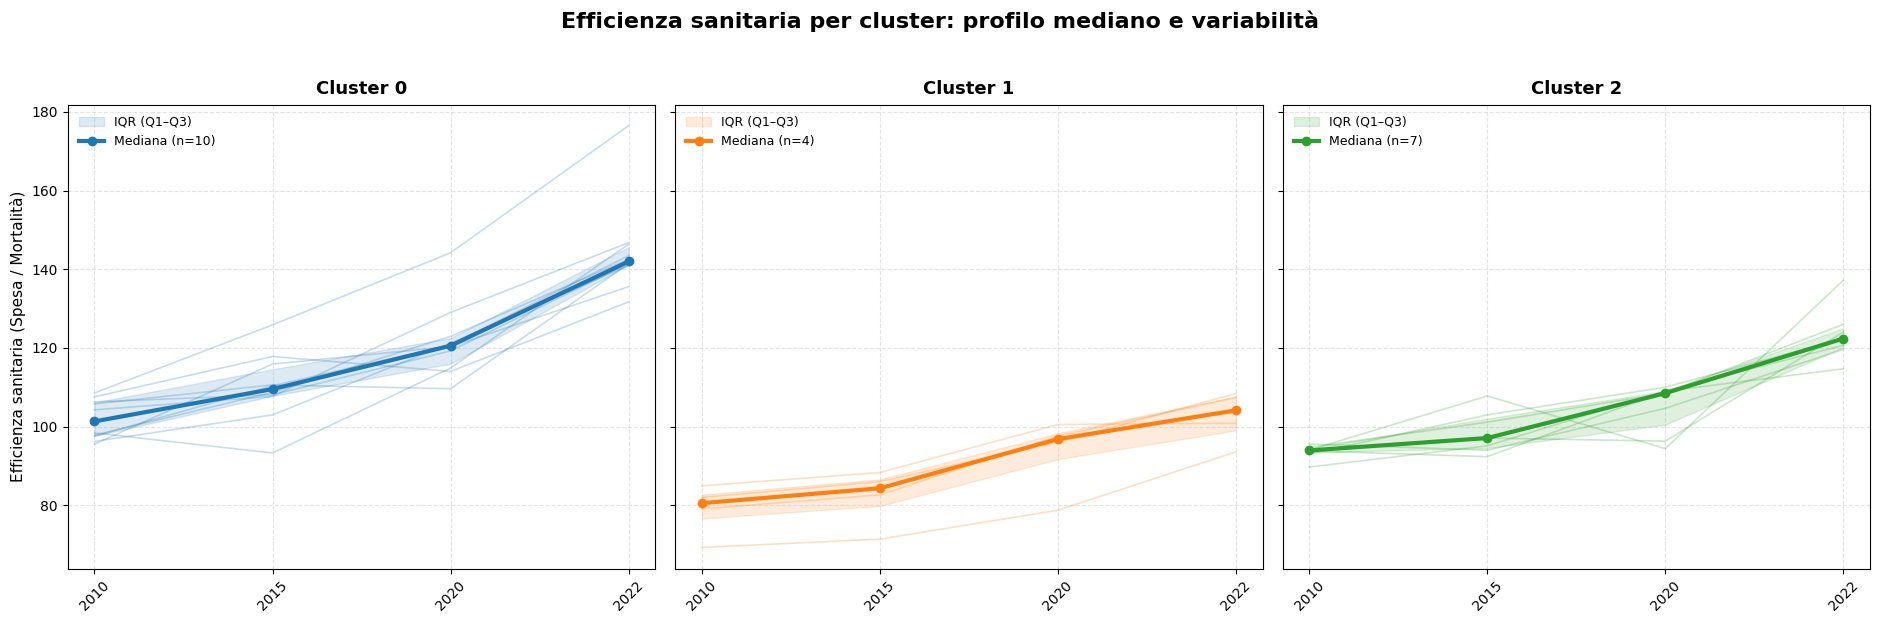

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


eff_parallel = efficienza.copy()
eff_parallel["Cluster"] = pca_df.set_index("Regione")["Cluster"]
eff_parallel["Regione"] = eff_parallel.index

anni = list(efficienza.columns)
clusters = sorted(eff_parallel["Cluster"].unique())
x = np.arange(len(anni)) 


try:
    cluster_palette
except NameError:
    default_colors = plt.cm.tab10.colors
    cluster_palette = {cid: default_colors[i % len(default_colors)] for i, cid in enumerate(clusters)}


n = len(clusters)
fig, axes = plt.subplots(1, n, figsize=(6.3*n, 6), sharey=True)
if n == 1: 
    axes = [axes]

for ax, cid in zip(axes, clusters):
    df_c = eff_parallel[eff_parallel["Cluster"] == cid]

  
    for _, row in df_c.iterrows():
        y = row[anni].astype(float).values
        ax.plot(anni, y, color=cluster_palette[cid], linewidth=1.2, alpha=0.25)

 
    q = df_c[anni].astype(float).quantile([0.25, 0.75])
    q25, q75 = q.loc[0.25].values, q.loc[0.75].values
    ax.fill_between(x, q25, q75, color=cluster_palette[cid], alpha=0.15, label="IQR (Q1–Q3)")


    med = df_c[anni].astype(float).median(axis=0).values
    ax.plot(anni, med, color=cluster_palette[cid], linewidth=3, marker="o", label=f"Mediana (n={len(df_c)})")


    ax.set_title(f"Cluster {cid}", fontsize=13, fontweight="bold", pad=8)
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(frameon=False, fontsize=9, loc="upper left")


axes[0].set_ylabel("Efficienza sanitaria (Spesa / Mortalità)", fontsize=11)
fig.suptitle("Efficienza sanitaria per cluster: profilo mediano e variabilità", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()


c:\Users\colai\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\array.py:334: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  self.crs = crs
c:\Users\colai\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\geodataframe.py:409: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  level.crs = crs


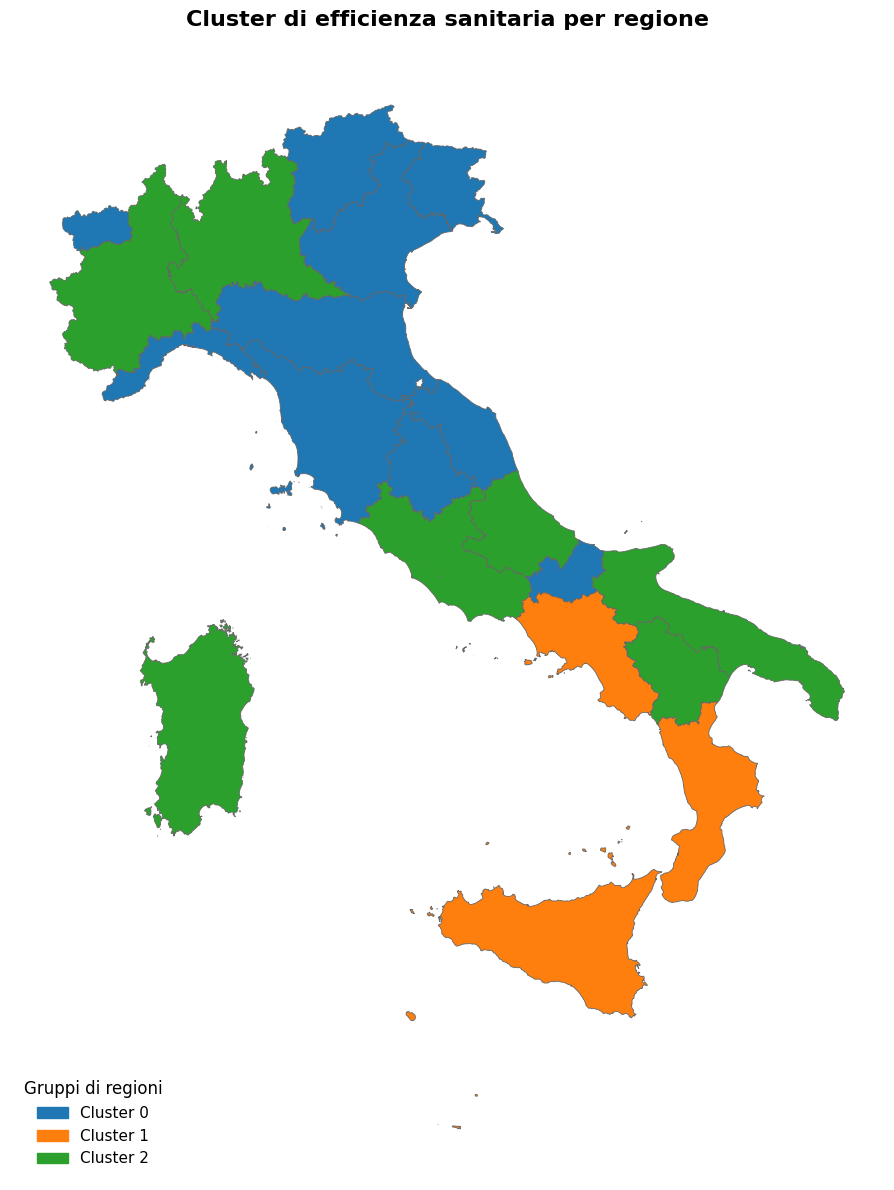

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


shapefile_path = "Limiti01012025_g/Reg01012025_g/Reg01012025_g_WGS84.shp"
gdf = gpd.read_file(shapefile_path)


def normalizza_nome(nome):
    if isinstance(nome, str):
        return nome.split("/")[0].strip()
    return nome

gdf["REGIONE_NORM"] = gdf["DEN_REG"].apply(normalizza_nome)
pca_df["REGIONE_NORM"] = pca_df["Regione"].apply(normalizza_nome)


df_map = gdf.merge(pca_df[["REGIONE_NORM", "Cluster"]], on="REGIONE_NORM", how="left")

cluster_palette = {
    0: "#1f77b4",  
    1: "#ff7f0e",  
    2: "#2ca02c",  
}
colors = df_map["Cluster"].map(cluster_palette)


fig, ax = plt.subplots(figsize=(10, 12))
df_map.plot(color=colors, edgecolor="0.4", linewidth=0.6, ax=ax)


ax.set_title("Cluster di efficienza sanitaria per regione", fontsize=16, weight="bold", pad=20)
ax.axis("off")


patches = [
    mpatches.Patch(color=col, label=f"Cluster {cid}") 
    for cid, col in cluster_palette.items()
]
plt.legend(
    handles=patches,
    title="Gruppi di regioni",
    loc="lower left",
    frameon=False,
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.show()


In [ ]:

cluster_regioni = (
    pca_df.groupby("Cluster")["Regione"]
    .apply(list)
    .to_dict()
)


for cid, regioni in cluster_regioni.items():
    print(f"\nCluster {cid}:")
    for r in regioni:
        print(f"  - {r}")



Cluster 0:
  - Valle d'Aosta/Vallée d'Aoste
  - Liguria
  - Veneto
  - Friuli-Venezia Giulia
  - Emilia-Romagna
  - Toscana
  - Umbria
  - Marche
  - Molise
  - Trentino-Alto Adige

Cluster 1:
  - Campania
  - Calabria
  - Sicilia
  - Mezzogiorno

Cluster 2:
  - Piemonte
  - Lombardia
  - Lazio
  - Abruzzo
  - Puglia
  - Basilicata
  - Sardegna


C:\Users\colai\AppData\Local\Temp\ipykernel_16644\2693589317.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df_.replace(["....", "-", "..."], pd.NA).astype(float)
C:\Users\colai\AppData\Local\Temp\ipykernel_16644\2693589317.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df_.replace(["....", "-", "..."], pd.NA).astype(float)


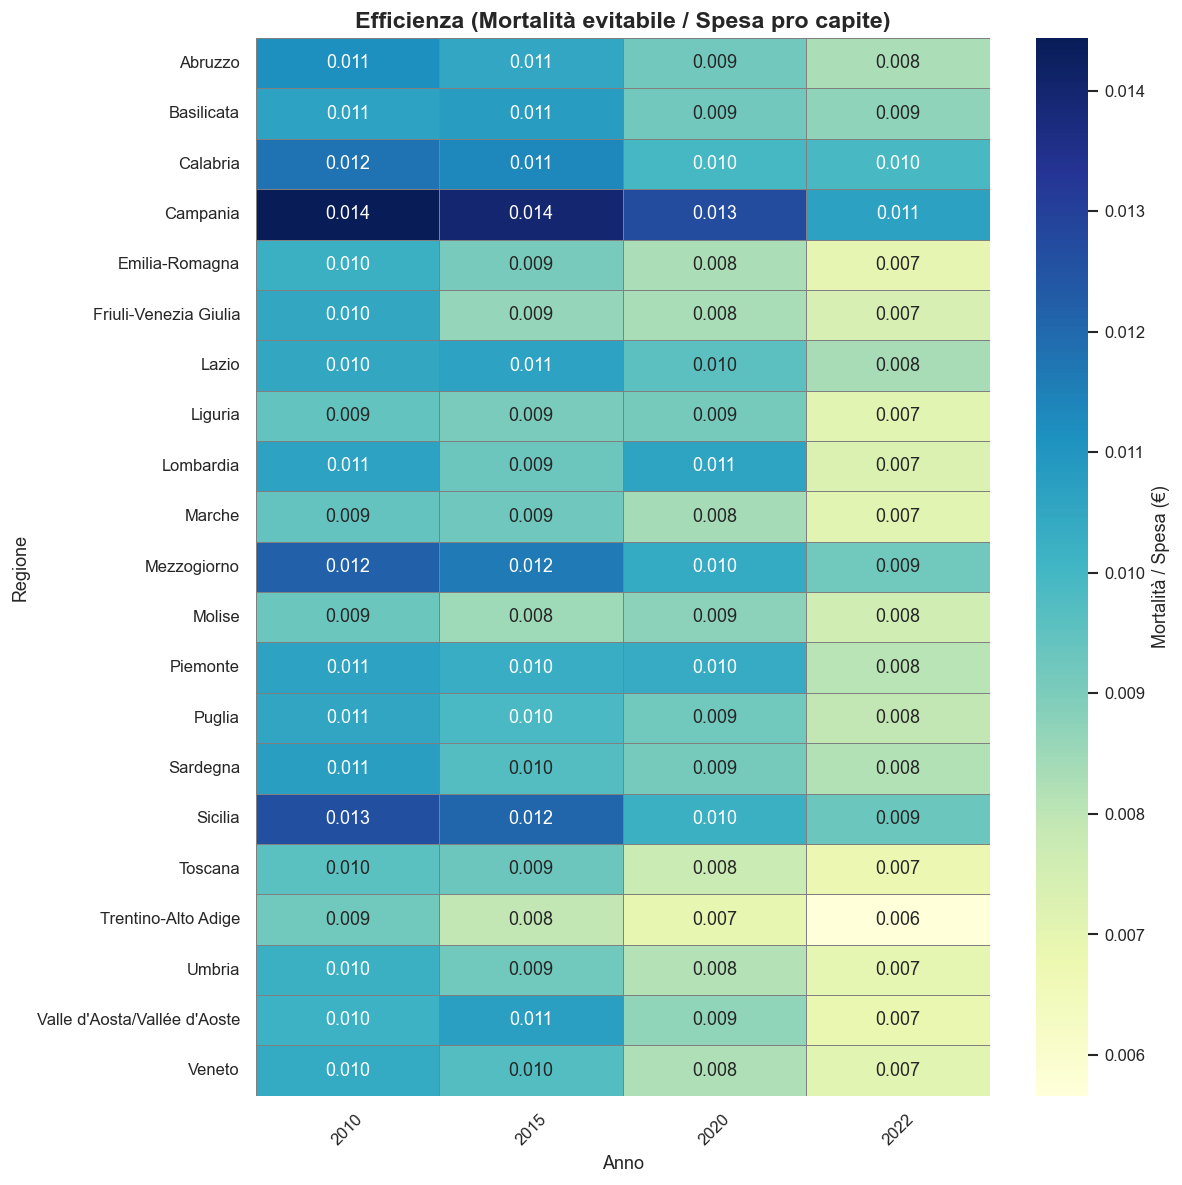

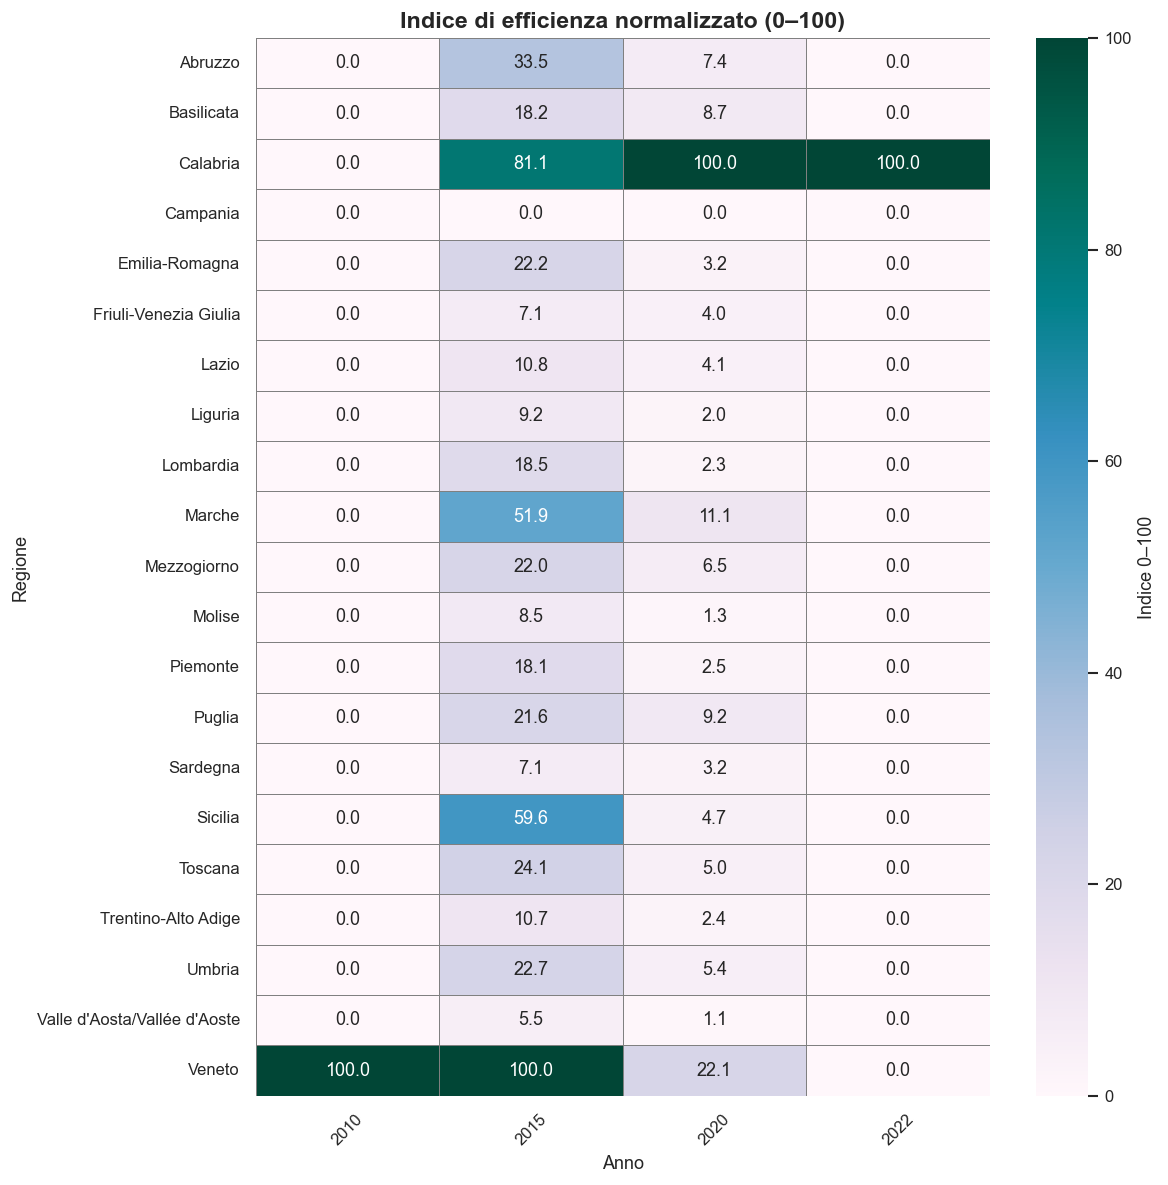

C:\Users\colai\AppData\Local\Temp\ipykernel_16644\2693589317.py:115: UserWarning: Glyph 8743 (\N{LOGICAL AND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\colai\AppData\Local\Temp\ipykernel_16644\2693589317.py:117: UserWarning: Glyph 8743 (\N{LOGICAL AND}) missing from font(s) Arial.
  plt.savefig(save_as, bbox_inches="tight")
C:\Users\colai\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8743 (\N{LOGICAL AND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


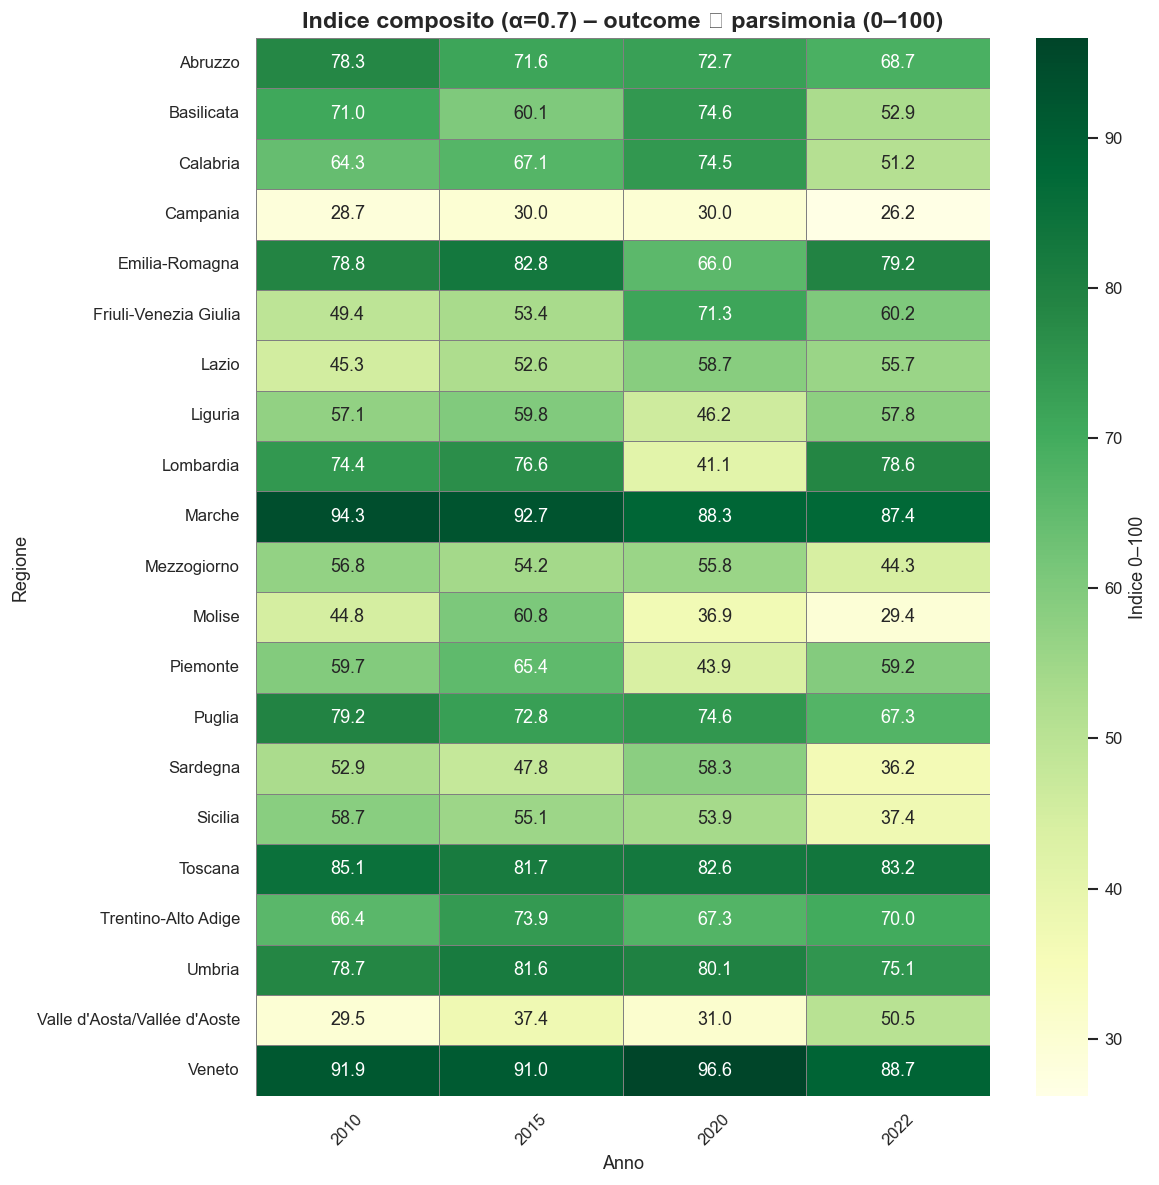


Top 5 (2022) – migliore = valore più BASSO (mortalità/spesa)
                                  2022
Territorio                            
Trentino-Alto Adige           0.005661
Toscana                       0.006815
Valle d'Aosta/Vallée d'Aoste  0.006833
Emilia-Romagna                0.006972
Umbria                        0.007017

Top 5 (2022) – migliore = valore più ALTO (indice normalizzato)
                    2022
Territorio              
Calabria    1.000000e+02
Veneto      1.435468e-06
Marche      1.266225e-06
Abruzzo     1.213701e-06
Lombardia   8.887979e-07

Top 5 (2022) – migliore = valore più ALTO (indice composito)
                     2022
Territorio               
Veneto          88.704541
Marche          87.359099
Toscana         83.158094
Emilia-Romagna  79.213387
Lombardia       78.609151


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


FILE = "Sanità_e_salute.xlsx"
SHEET = "Dati Italia e Regioni"
ANNI = ["2010", "2015", "2020", "2022"]
ALPHA = 0.7


df = pd.read_excel(FILE, sheet_name=SHEET)

spesa = df[
    (df["Indicatore"] == "Spesa sanitaria pubblica corrente per abitante") &
    (df["Modalità"].str.lower() == "totale") &
    (df["Unità di misura"].str.lower().str.contains("euro")) &
    (~df["Territorio"].str.contains("Italia|Nord|Sud|Centro", na=False))
][["Territorio"] + ANNI].copy().set_index("Territorio")

mortalita = df[
    (df["Indicatore"] == "Tasso standardizzato di mortalità evitabile") &
    (df["Modalità"].str.lower() == "totale") &
    (~df["Territorio"].str.contains("Italia|Nord|Sud|Centro", na=False))
][["Territorio"] + ANNI].copy().set_index("Territorio")

def to_float(df_):
    return df_.replace(["....", "-", "..."], pd.NA).astype(float)

spesa_clean = to_float(spesa)
mortalita_clean = to_float(mortalita)


def find_labels(index, substrings):
    subs = [s.lower() for s in substrings]
    return [lab for lab in index if any(s in lab.lower() for s in subs)]

bolzano_lab = find_labels(spesa_clean.index, ["bolzano", "bozen", "südtirol", "alto adige"])
trento_lab  = find_labels(spesa_clean.index, ["trento"])

taa_rows = list(dict.fromkeys(bolzano_lab + trento_lab))  # unici e ordinati


if len(taa_rows) == 0:
    raise ValueError(
        "Non ho trovato etichette per Bolzano/Bozen o Trento. "
        "Controlla i nomi nel file (es. 'Provincia Autonoma di Bolzano/Bozen')."
    )

spesa_trentino = spesa_clean.loc[taa_rows].mean(skipna=True)
mortalita_trentino = mortalita_clean.loc[taa_rows].mean(skipna=True)


to_drop = [lab for lab in spesa_clean.index
           if any(k in lab.lower() for k in
                  ["bolzano", "bozen", "trento", "trentino-alto", "südtirol", "alto adige"])]
spesa_clean = spesa_clean.drop(index=to_drop, errors="ignore")
mortalita_clean = mortalita_clean.drop(index=to_drop, errors="ignore")

spesa_clean.loc["Trentino-Alto Adige"] = spesa_trentino
mortalita_clean.loc["Trentino-Alto Adige"] = mortalita_trentino

# Allineo insiemi/ordine
spesa_clean = spesa_clean[~spesa_clean.index.duplicated(keep="first")].sort_index()
mortalita_clean = mortalita_clean.loc[spesa_clean.index]

eff_ratio = mortalita_clean / spesa_clean

def minmax_by_col(df_):
    return (df_ - df_.min()) / (df_.max() - df_.min())

spesa_norm = minmax_by_col(spesa_clean)           
mort_norm = minmax_by_col(mortalita_clean)       
qualita = 1 - mort_norm                           
eff_norm = (qualita / (spesa_norm + 1e-9))
eff_norm = 100 * minmax_by_col(eff_norm)          


parsimonia = 1 - spesa_norm
ind_composito = 100 * (ALPHA * qualita + (1 - ALPHA) * parsimonia)


sns.set(font_scale=0.9)
plt.rcParams["figure.dpi"] = 120

def heatmap(df_, titolo, cmap, cbar_label, fmt=".3f", save_as=None):
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(
        df_, cmap=cmap,
        linewidths=0.5, linecolor="gray",
        annot=True, fmt=fmt,
        cbar_kws={"label": cbar_label}
    )
    ax.set_title(titolo, fontsize=14, weight="bold")
    ax.set_xlabel("Anno"); ax.set_ylabel("Regione")
    plt.xticks(rotation=45)
    plt.tight_layout()
    if save_as:
        plt.savefig(save_as, bbox_inches="tight")
    plt.show()

heatmap(
    eff_ratio,
    "Efficienza (Mortalità evitabile / Spesa pro capite)",
    cmap="YlGnBu",
    cbar_label="Mortalità / Spesa (€)",
    fmt=".3f",
    save_as="heatmap_eff_ratio.png"
)

heatmap(
    eff_norm,
    "Indice di efficienza normalizzato (0–100)",
    cmap="PuBuGn",
    cbar_label="Indice 0–100",
    fmt=".1f",
    save_as="heatmap_eff_norm.png"
)

heatmap(
    ind_composito,
    f"Indice composito (α={ALPHA:.1f}) – outcome ∧ parsimonia (0–100)",
    cmap="YlGn",
    cbar_label="Indice 0–100",
    fmt=".1f",
    save_as="heatmap_indice_composito.png"
)


def ranking_col(df_, col="2022", ascending=True, top=5):
    r = df_[col].sort_values(ascending=ascending)
    return r.to_frame(name=col).head(top)

print("\nTop 5 (2022) – migliore = valore più BASSO (mortalità/spesa)")
print(ranking_col(eff_ratio, col="2022", ascending=True))

print("\nTop 5 (2022) – migliore = valore più ALTO (indice normalizzato)")
print(ranking_col(eff_norm, col="2022", ascending=False))

print("\nTop 5 (2022) – migliore = valore più ALTO (indice composito)")
print(ranking_col(ind_composito, col="2022", ascending=False))
